In [1]:
import io
from IPython.nbformat import current
def execute_notebook(nbfile):
    with io.open(nbfile) as f:
        nb = current.read(f, 'json')
    ip = get_ipython()
    for cell in nb.worksheets[0].cells:
        if cell.cell_type != 'code':
            continue
        ip.run_cell(cell.input)
execute_notebook("/cellar/users/ramarty/Projects/hla_ii/bin/imports.ipynb")

/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/IPython/nbformat/current.py:19: UserWarning: IPython.nbformat.current is deprecated.

- use IPython.nbformat for read/write/validate public API
- use IPython.nbformat.vX directly to composing notebooks of a particular version

  """)
/cellar/users/ramarty/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
cibersort = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/cibersort.csv', index_col=0)
cytotoxicity = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/cytotoxicity.csv', index_col=0)

In [3]:
cytotoxicity.head()

,GZMA,PRF1,Cytolytic
TCGA-DJ-A13L,803,562,671.778237
TCGA-30-1718,230,235,232.486559
TCGA-KO-8405,442,470,455.785037
TCGA-77-8154,47,65,55.272054
TCGA-37-4130,7547,4186,5620.653165


In [4]:
infiltration = pd.merge(cibersort, cytotoxicity, left_index=True, right_index=True)

In [5]:
clinical = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/mhc_diversity/dataframe.csv', index_col=0)

In [6]:
df = pd.merge(clinical, infiltration, left_index=True, right_index=True)

In [7]:
cibersort.columns

Index([u'B cells naive', u'B cells memory', u'Plasma cells', u'T cells CD8',
       u'T cells CD4 naive', u'T cells CD4 memory resting',
       u'T cells CD4 memory activated', u'T cells follicular helper',
       u'T cells regulatory (Tregs)', u'T cells gamma delta',
       u'NK cells resting', u'NK cells activated', u'Monocytes',
       u'Macrophages M0', u'Macrophages M1', u'Macrophages M2',
       u'Dendritic cells resting', u'Dendritic cells activated',
       u'Mast cells resting', u'Mast cells activated', u'Eosinophils',
       u'Neutrophils', u'P-value', u'Pearson Correlation', u'RMSE'],
      dtype='object')

In [8]:
df.head()

,classI,classII,Tissue,Age,Race,homozygous_classI,homozygous_classII,homozygous_total,passenger_coverageI,passenger_coverageII,...,Mast cells resting,Mast cells activated,Eosinophils,Neutrophils,P-value,Pearson Correlation,RMSE,GZMA,PRF1,Cytolytic
TCGA-DJ-A13L,0.504912,0.325147,THCA,85.0,WHITE,0.0,1.0,1.0,0.549342,0.394737,...,0.035407,0.0,0.0000,0.0,0.06,0.132262,1.030747,803,562,671.778237
TCGA-KO-8405,0.493124,0.305501,KICH,29.0,WHITE,0.0,0.0,0.0,0.516447,0.365132,...,0.017953,0.0,0.0000,0.0,0.00,0.326648,0.954581,442,470,455.785037
TCGA-77-8154,0.504912,0.314342,LUSC,67.0,NaN,0.0,2.0,2.0,0.520833,0.376096,...,0.086653,0.0,0.0000,0.0,0.04,0.158431,1.035869,47,65,55.272054
TCGA-37-4130,0.562868,0.313360,LUSC,56.0,WHITE,1.0,1.0,2.0,0.541667,0.376096,...,0.037836,0.0,0.0000,0.0,0.03,0.185014,1.018260,7547,4186,5620.653165
TCGA-P8-A5KD,0.540275,0.304519,PCPG,NaN,WHITE,0.0,0.0,0.0,0.540570,0.378289,...,0.084709,0.0,0.0005,0.0,0.46,0.017106,1.075191,109,123,115.788600


In [9]:
df['CD4/CD8 Ratio'] = (df['T cells CD4 naive'] + df['T cells CD4 memory resting'] 
                       + df['T cells CD4 memory activated']) / df['T cells CD8']

In [10]:
df.to_csv('/cellar/users/ramarty/Data/hla_ii/clinical/comprehensive_df.csv')

In [11]:
# bad for presentation: high t-regs, low cd4/cd8 ratio

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

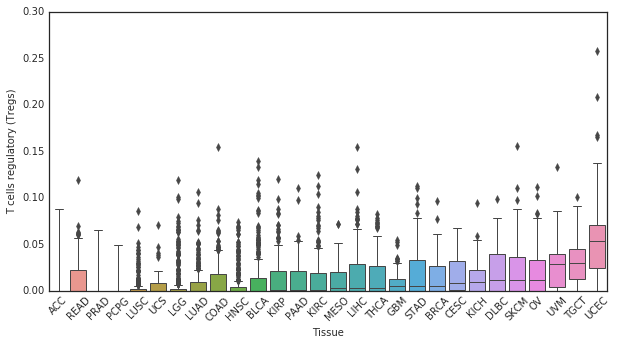

In [12]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Tissue', y='T cells regulatory (Tregs)', data=df,
           order=df.groupby('Tissue').median().sort_values('T cells regulatory (Tregs)').index)
plt.xticks(rotation=45)


(0, 50)

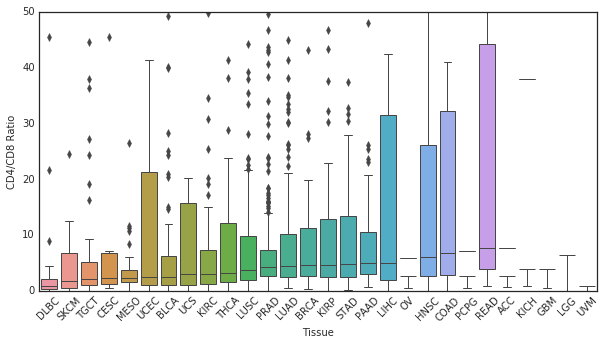

In [13]:
# ratio
plt.figure(figsize=(10, 5))
sns.boxplot(x='Tissue', y='CD4/CD8 Ratio', data=df,
           order=df.groupby('Tissue').median().sort_values('CD4/CD8 Ratio').index)
plt.xticks(rotation=45)
plt.ylim(0, 50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

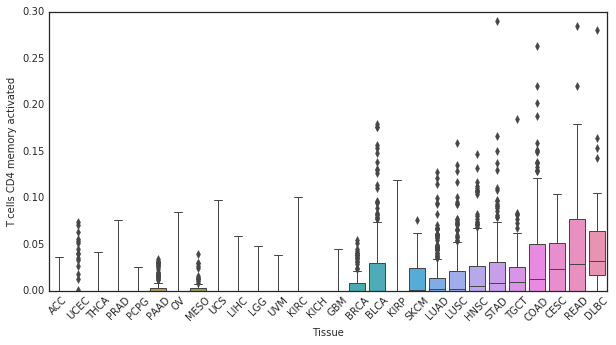

In [14]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Tissue', y='T cells CD4 memory activated', data=df,
           order=df.groupby('Tissue').median().sort_values('T cells CD4 memory activated').index)
plt.xticks(rotation=45)
#plt.ylim(0, 50)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text xticklabel objects>)

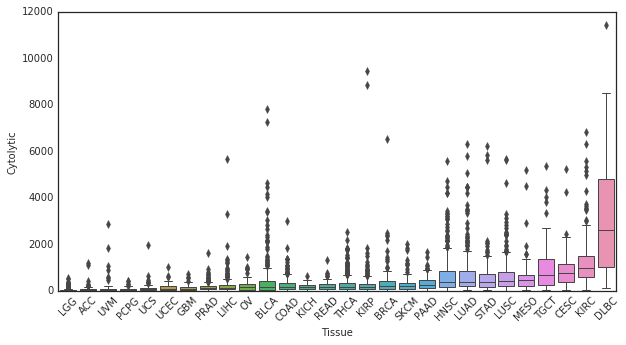

In [15]:
# cytolytic
plt.figure(figsize=(10, 5))
sns.boxplot(x='Tissue', y='Cytolytic', data=df,
           order=df.groupby('Tissue').median().sort_values('Cytolytic').index)
plt.xticks(rotation=45)

In [ ]:
# Get rank with selection, make correlations???

class_i
SpearmanrResult(correlation=-0.30098642831144035, pvalue=0.22486423373190059)
SpearmanrResult(correlation=-0.16615067079463364, pvalue=0.50995046034389602)
SpearmanrResult(correlation=0.056788856303031834, pvalue=0.82289926462248952)


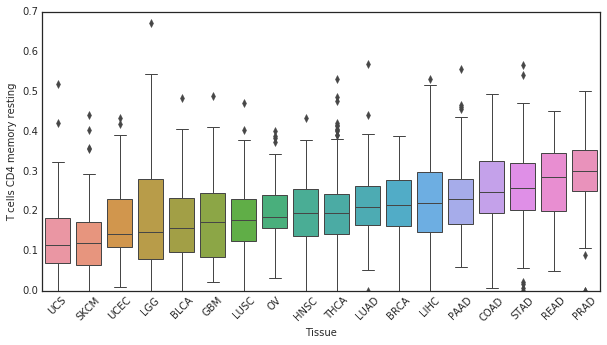

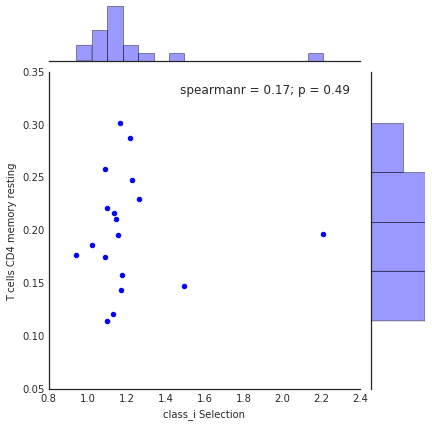

class_ii
SpearmanrResult(correlation=0.084893607985278036, pvalue=0.73768456184130426)
SpearmanrResult(correlation=0.19504643962848298, pvalue=0.43798642970216684)
SpearmanrResult(correlation=0.045431085042425469, pvalue=0.85793637281087198)


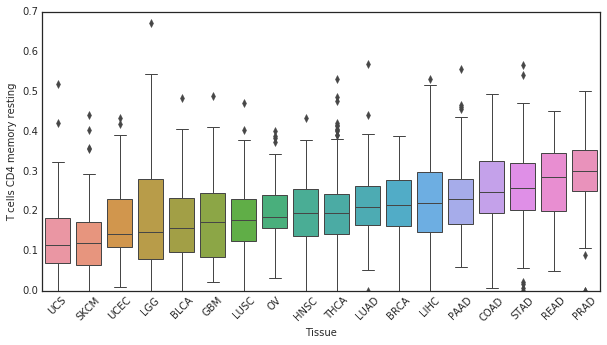

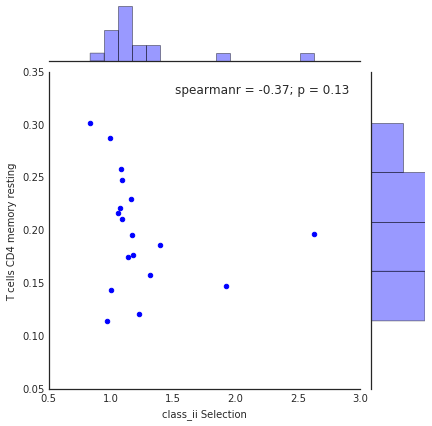

In [16]:
for c in ['class_i', 'class_ii']:
    print c
    selection = pd.read_csv('/cellar/users/ramarty/Data/hla_ii/generated_data/OR_clean/tissue/{0}/cancer.thresh_2.txt'.format(c))

    merged = pd.merge(df.groupby('Tissue').median()[['Cytolytic', 'CD4/CD8 Ratio'] + list(cibersort.columns)],
             selection[['OR']], left_index=True, right_index=True) 
    print sp.spearmanr(merged.OR, merged['T cells regulatory (Tregs)'])
    print sp.spearmanr(merged.OR, merged['Cytolytic'])
    print sp.spearmanr(merged.OR, merged['CD4/CD8 Ratio'])
    for cell_type in cibersort.columns:
        if sp.spearmanr(merged.OR, merged[cell_type])[1] < 0.05:
            print cell_type, sp.spearmanr(merged.OR, merged[cell_type])
    cell_type = 'T cells CD4 memory resting'
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Tissue', y=cell_type, data=df[df.Tissue.isin(merged.index)],
               order=[x for x in df.groupby('Tissue').median().sort_values(cell_type).index if x in merged.index])
    plt.xticks(rotation=45)
    #plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/infiltration/CD4_resting.boxplot.{0}.pdf'.format(c))
    plt.show()
    plt.clf()
    merged['{0} Selection'.format(c)] = merged['OR']
    sns.jointplot('{0} Selection'.format(c), 'T cells CD4 memory resting', data=merged, stat_func=sp.spearmanr)
    #plt.savefig('/cellar/users/ramarty/Data/hla_ii/generated_figures/infiltration/CD4_resting.correlation.{0}.pdf'.format(c))
    plt.show()
    plt.clf()

PHBR score analysis

In [98]:
sp.hmean([4, 3, 5, 6, 7])

4.5751633986928111

In [99]:
sp.hmean([4, 3, 5, 6, 7, 5])

4.6408839779005531